In [54]:
import json

import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

competitionID='RU1'

response = requests.get(f'http://localhost:8080/mongo/games/competition/{competitionID}').json()
games_df = pd.DataFrame(response)

games_df

,_id,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,65789684e2ebee12cbdfe731,4225543,RU1,2023,16. Matchday,2023-11-26T00:00:00.000Z,14589,3725,1,1,...,Gazovik,2420,Artem Lyubimov,https://www.transfermarkt.co.uk/fk-orenburg_ak...,4-3-3 Attacking,4-2-3-1,FC Orenburg,RFK Akhmat Grozny,1:1,domestic_league
1,65789684e2ebee12cbdff59d,4225544,RU1,2023,16. Matchday,2023-11-26T00:00:00.000Z,11127,16704,3,1,...,Yekaterinburg Arena,5155,Sergey Ivanov,https://www.transfermarkt.co.uk/ural-yekaterin...,4-2-3-1,4-3-3 Attacking,FK Ural Yekaterinburg,FK Krasnodar,3:1,domestic_league
2,65789684e2ebee12cbdff59e,4225545,RU1,2023,16. Matchday,2023-11-26T00:00:00.000Z,2698,1124,1,0,...,Ak Bars Arena,3725,Evgeni Kukulyak,https://www.transfermarkt.co.uk/rubin-kazan_fa...,3-4-3,4-4-2 double 6,FC Rubin Kazan,FK Fakel Voronezh,1:0,domestic_league
3,65789685e2ebee12cbe03763,4225546,RU1,2023,16. Matchday,2023-11-26T00:00:00.000Z,1083,49702,1,0,...,Rostov Arena,6941,Yan Bobrovskiy,https://www.transfermarkt.co.uk/fk-rostov_fc-p...,4-1-4-1,3-5-2,FK Rostov,FK Nizhny Novgorod,1:0,domestic_league
4,65789685e2ebee12cbe071eb,4225541,RU1,2023,16. Matchday,2023-11-25T00:00:00.000Z,2410,121,2,3,...,VEB Arena,8423,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_dy...,3-4-2-1,4-2-3-1,PFK CSKA Moskva,FK Dinamo Moskva,2:3,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,65789685e2ebee12cbe054b6,2222592,RU1,2012,1. Matchday,2012-07-22T00:00:00.000Z,2696,3725,1,1,...,Metallurg,9500,Sergey Karasev,https://www.transfermarkt.co.uk/krylya-sovetov...,,,PFK Krylya Sovetov Samara,RFK Akhmat Grozny,1:1,domestic_league
2764,65789684e2ebee12cbdfe733,2222587,RU1,2012,1. Matchday,2012-07-21T00:00:00.000Z,2410,1083,1,0,...,Arena Khimki,12000,Aleksandr Egorov,https://www.transfermarkt.co.uk/cska-moscow_fk...,,,PFK CSKA Moskva,FK Rostov,1:0,domestic_league
2765,65789686e2ebee12cbe08099,2222590,RU1,2012,1. Matchday,2012-07-21T00:00:00.000Z,12438,121,1,0,...,Zentralstadion Lokomotiv,6100,Sergey Lapochkin,https://www.transfermarkt.co.uk/volga-nizhniy-...,,,Volga Nizhniy Novgorod (- 2016),FK Dinamo Moskva,1:0,domestic_league
2766,65789686e2ebee12cbe09a49,2222586,RU1,2012,1. Matchday,2012-07-21T00:00:00.000Z,2703,232,1,2,...,Republican Stadium Spartak,28500,Vitali Meshkov,https://www.transfermarkt.co.uk/alania-vladika...,,,Spartak Vladikavkaz (-2020),FK Spartak Moskva,1:2,domestic_league


In [55]:
clubs = requests.get(f'http://localhost:8080/mongo/games/competition/{competitionID}/clubs').json()

In [56]:
data = np.array([])
for club in clubs:
    response = requests.get(f'http://localhost:8080/mongo/game_events/club/{club}').json()
    data = np.hstack((data, response))
    
events_df = pd.DataFrame.from_records(data)
events_df

,_id,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,6578966de2ebee12cbd58727,d6e5fdbc63a4037b837245dc9bfddbe1,2012-07-21T00:00:00.000Z,2222590,78,Substitutions,121,26462,", Not reported",181177.0,NaN
1,6578966de2ebee12cbd58728,7c9e034092f0a67f758a8eb3c8ae570d,2012-07-21T00:00:00.000Z,2222590,88,Substitutions,121,45858,", Not reported",89589.0,NaN
2,6578966de2ebee12cbd5876c,61c3b34cafe7c4eea1fc58ed99eadd3e,2012-08-25T00:00:00.000Z,2222596,90,Substitutions,121,15112,", Delay",89589.0,NaN
3,6578966de2ebee12cbd5876e,d92201df4be378e3a2a7d74534cbf592,2012-08-25T00:00:00.000Z,2222596,84,Cards,121,31068,1. Yellow card,NaN,NaN
4,6578966de2ebee12cbd58770,6f19e6d0389ec18c9b186b6d42b908dc,2012-08-25T00:00:00.000Z,2222596,46,Substitutions,121,34396,", Tactical",61960.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34847,6578967ae2ebee12cbdfaf9b,bdee4adc2ca36b8f40ff85841c6cd790,2023-11-26T00:00:00.000Z,4225546,90,Cards,49702,404912,"1. Yellow card , Tactical foul",NaN,NaN
34848,6578967ae2ebee12cbdfaf9c,cecc938f19a387c015b5e8b3eb9c9988,2023-11-26T00:00:00.000Z,4225546,63,Substitutions,49702,430592,", Tactical",340538.0,NaN
34849,6578967ae2ebee12cbdfaf9e,0340187ed5e4a95c73481ee324287567,2023-11-26T00:00:00.000Z,4225546,82,Substitutions,49702,458387,", Tactical",104700.0,NaN
34850,6578967ae2ebee12cbdfaf9f,0c62f200b9f43f22837abb46127e8f2d,2023-11-26T00:00:00.000Z,4225546,46,Substitutions,49702,487421,", Tactical",443778.0,NaN


# Evento partita per minuto di gioco

<Axes: xlabel='type', ylabel='minute'>

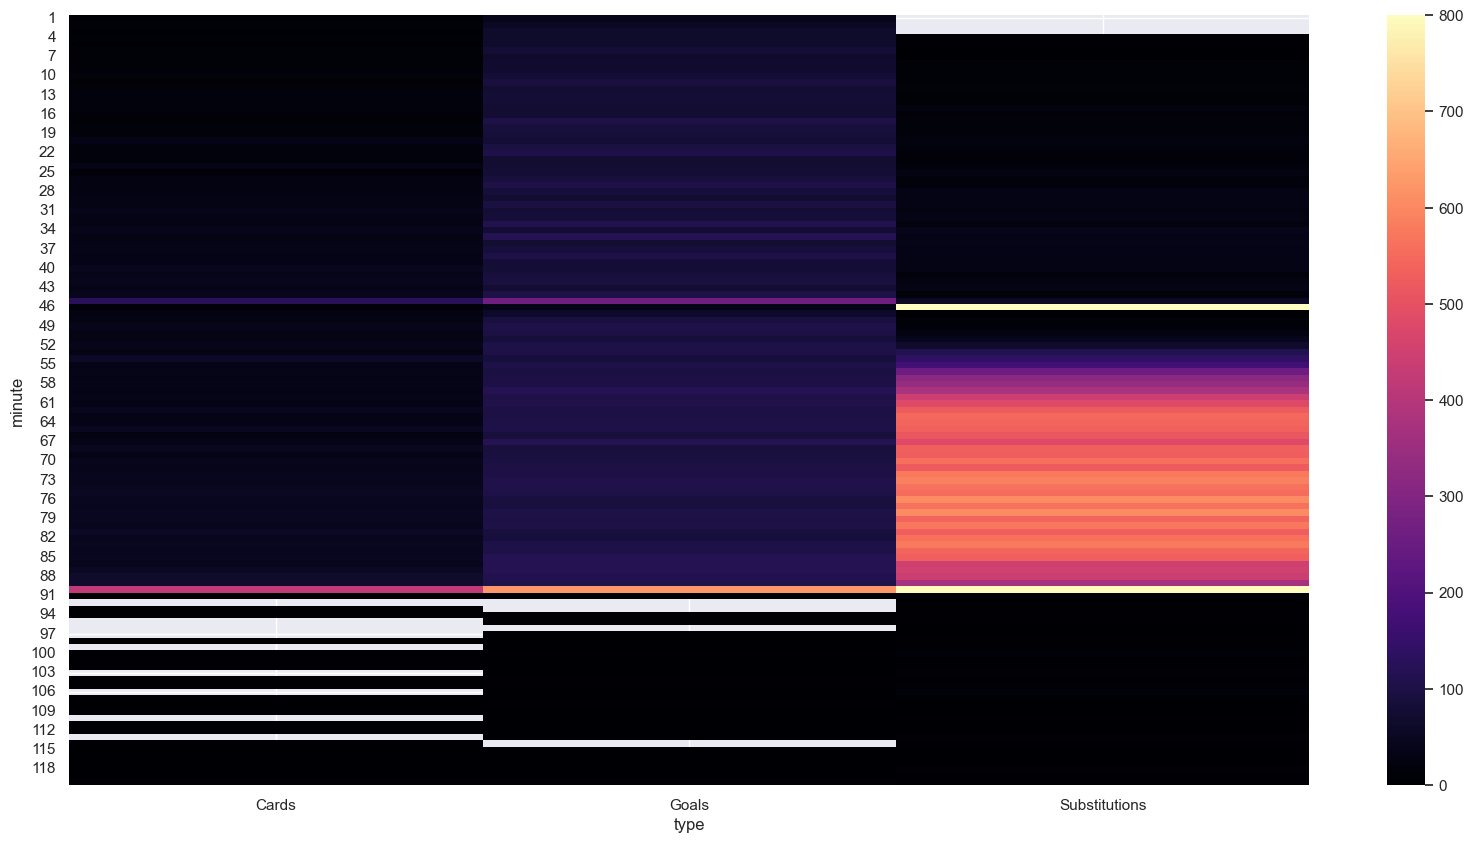

In [73]:
events_minute_available_df = events_df.query('minute != -1')
events_by_minute = events_minute_available_df.groupby(['type', 'minute']).size().reset_index(name='event_count')
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(events_by_minute.pivot(index='minute', columns='type', values='event_count'), vmin=0, vmax=800, cmap='magma')

Ci siamo chiesti quando determinati eventi in partita fossero piu' comuni per cui abbiamo deciso di creare una heatmap che mostrasse quanti eventi di ogni tipo sono registrati per ogni minuto di gioco.

# Goal medi per partita di club in casa e in trasferta

Bar chart

# Percentuale di vittoria di club in casa e in trasferta

Bar chart

# Efficacia formazioni

Heatmap, la percentuale di vittoria si riferisce alla formazione sulla sinistra del grafico

# Valori di mercato dei giocatori per paese di provenienza

Desc